In [13]:
plt.rcParams["figure.figsize"] = (15,6)

회귀분석에 사용된 데이터가 회귀분석에 사용된 모형 가정을 제대로 만족하고 있는지를 확인하는 과정이다.

## 잔차 정규성<br>


데이터가 모형 가정을 만족하면 분석결과로 나온 잔차는 정규분포를 따라야 한다.

예를 들어 다음과 같이 2차 비선형 관계를 가지는 데이터를 선형 모형으로 회귀 분석한 경우를 살펴보자.

QQ플롯과 정규성 검정에서 보듯이 잔차는 정규 분포를 따르지 않는다.

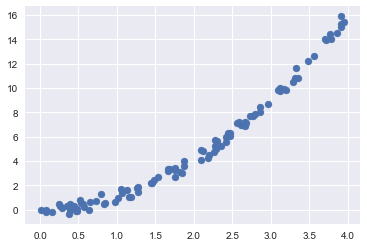

In [5]:
def make_regression2(n_sample = 100, bias=0, noise=0.3, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 4
    epsilon = noise * np.random.randn(n_sample)
    y = x ** 2 + bias + epsilon
    return x, y

x2, y2 = make_regression2()
plt.scatter(x2, y2)
plt.show()

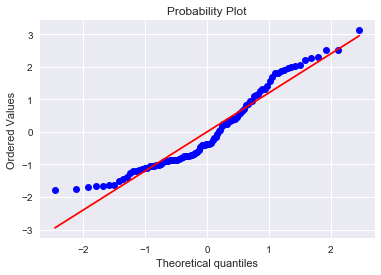

In [4]:
import statsmodels.api as sm
import scipy as sp
dfX20 = pd.DataFrame(x2, columns=["X1"])
dfX2 = sm.add_constant(dfX20)
dfy2 = pd.DataFrame(y2, columns=["y"])

model2 = sm.OLS(dfy2, dfX2)
result2 = model2.fit()
sp.stats.probplot(result2.resid, plot=plt)
plt.show()

## 잔차와 독립 변수의 관계

이 데이터도 2차 함수 관계를 따르고 있으므로 선형 모형을 따르지 않는다.

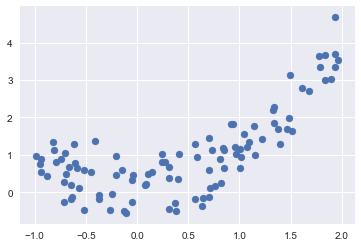

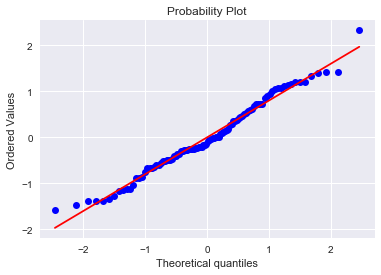

In [7]:
def make_regression3(n_sample = 100, bias=0, noise=0.5, random_state=0):
    np.random.seed(random_state)
    x = np.random.rand(n_sample) * 3 - 1
    epsilon = noise * np.random.randn(n_sample)
    y = x ** 2 + bias + epsilon
    return x, y

x3, y3 = make_regression3()
plt.scatter(x3, y3)
plt.show()

dfX30 = pd.DataFrame(x3, columns=["X1"])
dfX3 = sm.add_constant(dfX30)
dfy3 = pd.DataFrame(y3, columns=["y"])

model3 = sm.OLS(dfy3, dfX3)
result3 = model3.fit()

sp.stats.probplot(result3.resid, plot=plt)
plt.show()

In [10]:
import statsmodels.stats.api as sms
test = sms.omni_normtest(result3.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

Chi^2       :  1.202
P-value     :  0.548


데이터가 모형 가정을 따르지 않지만 잔차는 정규 분포를 따르는 것을 알 수 있다.

이러한 경우에는 **잔차와 독립 변수간의 관계**를 살펴보는 것이 도움이 될 수 있다.

잔차와 독립 변수간에 어떤 비선형 상관관계를 찾을 수 있다면 올바른 모형이 아니다.

다만 잔차와 특정 독립 변수간의 관계를 전체 모형이 올바른 모형이 아니라는 것을 알려줄 뿐이지 어떤 모형이 올바른 모형인지에 대한 정보는 주지 않는다.

## Partial Regression Plot

독립변수의 갯수가 많을 경우에 특정한 하나의 독립변수의 영향력을 시각화하는 방법

1. 특정한 독립변수 Z를 제외한 나머지 독립변수 X들로 종속변수를 선형회귀하여 잔차 $e_{YX}$를 구한다.
2. 나머지 독립변수 X들로 특정한 독립변수 선형회귀하여 잔차 $e_{ZX}$를 구한다.
3. 잔차 $e_{ZX}$를 독립변수로, 잔차 $e_{YX}$를 종속변수로 하여 선형회귀한다.


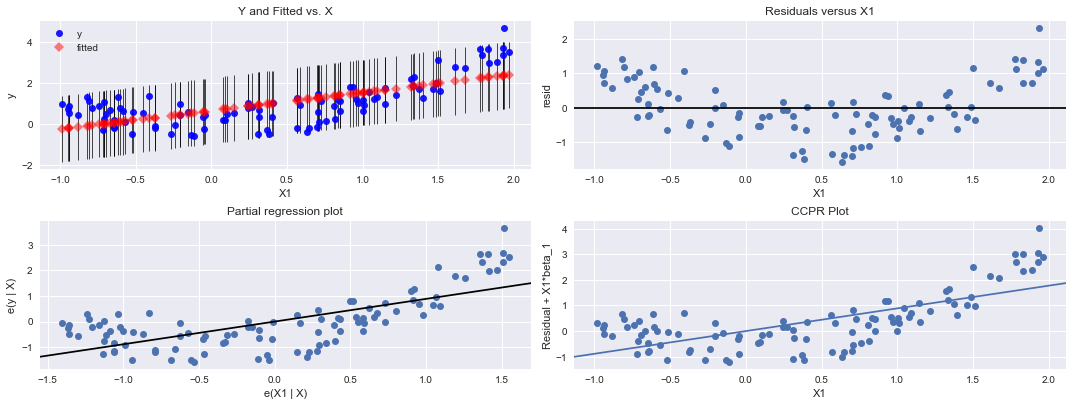

In [12]:
fig = sm.graphics.plot_regress_exog(result3, "X1")
fig.suptitle("")
plt.show()